In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
x_train = np.array(
    [
        [4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
        [8.9], [5.2], [8.59], [2.1], [8], [10], [4.5],
        [6], [4]
    ],
    dtype = np.float32
)

y_train = np.array(
    [
        [2.6], [1.6], [3.9], [2.4], [2.4], [3.357],
        [2.6], [1.96], [3.53], [1.76], [3.2], [3.5],
        [1.6], [2.5], [2.2]
    ],
    dtype = np.float32
)

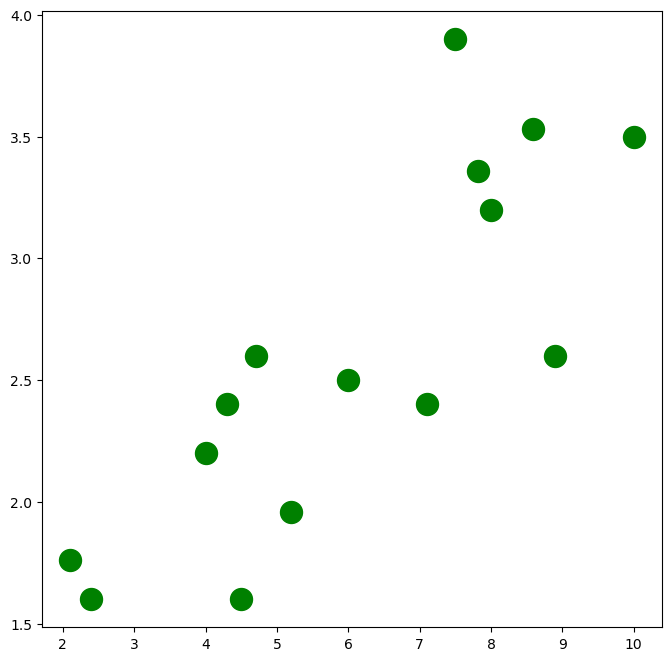

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.show()

In [9]:
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [11]:
x.size()

torch.Size([15, 1])

In [3]:
inp = 1
hidden = 5
out = 1

In [18]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, out)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

In [19]:
learning_rate = 1e-4

'''
for i in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
'''

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 30.52065658569336
1 23.517610549926758
2 18.218664169311523
3 14.248641967773438
4 11.302973747253418
5 9.137323379516602
6 7.558551788330078
7 6.4163665771484375
8 5.5955939292907715
9 5.009239196777344
10 4.592440605163574
11 4.297393798828125
12 4.0892229080200195
13 3.942711114883423
14 3.8397557735443115
15 3.767453193664551
16 3.716647148132324
17 3.6808760166168213
18 3.6555979251861572
19 3.637627363204956
20 3.6247365474700928
21 3.615374803543091
22 3.60845947265625
23 3.603241205215454
24 3.5991969108581543
25 3.5959665775299072
26 3.59329891204834
27 3.591020107269287
28 3.5890133380889893
29 3.5871939659118652
30 3.5855002403259277
31 3.5839004516601562
32 3.582361936569214
33 3.580867290496826
34 3.5794034004211426
35 3.5779614448547363
36 3.576533794403076
37 3.575117826461792
38 3.5737106800079346
39 3.5723109245300293
40 3.570913314819336
41 3.56952166557312
42 3.5681324005126953
43 3.5667459964752197
44 3.565361499786377
45 3.5639798641204834
46 3.5626003742218018
4

In [20]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.1072],
        [1.3611],
        [3.0156],
        [2.8859],
        [1.9775],
        [3.1182],
        [3.4698],
        [2.2695],
        [3.3693],
        [1.2637],
        [3.1778],
        [3.8267],
        [2.0424],
        [2.5290],
        [1.8802]], grad_fn=<AddmmBackward0>)

In [21]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.1072476],
       [1.361073 ],
       [3.0156343],
       [2.8858645],
       [1.9774783],
       [3.118152 ],
       [3.4698272],
       [2.2694595],
       [3.369256 ],
       [1.2637458],
       [3.177846 ],
       [3.8266933],
       [2.042363 ],
       [2.5289984],
       [1.880151 ]], dtype=float32)

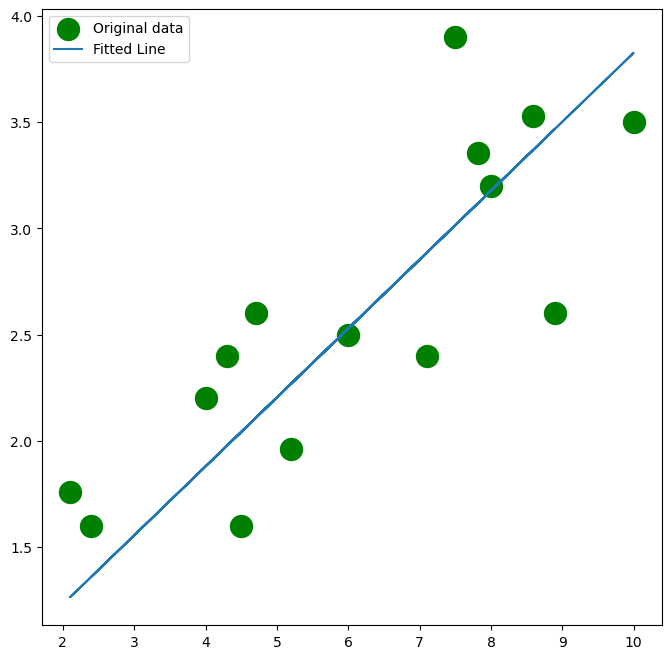

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted Line')
plt.legend()
plt.show()